In [2]:
%run ./01_data_prep.ipynb
%run ./utils.ipynb
#data is stored in X_train, X_valid, y_train, y_valid

In [3]:
from sklearn.neighbors import KNeighborsClassifier

## Training a KNN Classifier with neighbors = 5

In [4]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=4)

In [5]:
knn.score(X_valid, y_valid)

0.7761395133969818

## Tuning the classifier with GridSearch

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [12]:
# Trying with neighbors set on range 1-25
param_grid = {'n_neighbors' : np.arange(1, 15)}

# Cross validating data with 5 folds
knn_gs = GridSearchCV(knn, param_grid, cv=5)

knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=4),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [16]:
# Check score when n = best value according to grid search
knn_gs.best_score_

0.7634932493445672

In [17]:
# Check best value for number of neighbors
knn_gs.best_params_

{'n_neighbors': 5}

In [9]:
p = list(range(1, 20, 2))
lst_test =[]
lst_train =[]
for i in p:
    knn2 = KNeighborsClassifier(n_neighbors = i, n_jobs=4)
    knn2.fit(X_train, y_train)
    z = knn2.score(X_valid, y_valid)
    t = knn2.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)

In [10]:
import matplotlib.pyplot as plt

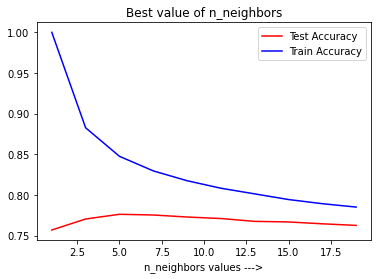

In [11]:
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('n_neighbors values --->')
plt.title('Best value of n_neighbors')
plt.legend()
plt.savefig('knn_complexity.png')

This matches the findings of GridSearch, best value for number of neighbors hyperparameter is 5

In [4]:
# Using n_neighbors = 5
model = KNeighborsClassifier(n_neighbors = 5)

plot_learning_curve(model, "KNN Learning Curve", X_train, y_train, n_jobs=4)
plt.savefig("learning_curve_knn.png")

Plot shows high variance but decreasing bias with more training data.